In [3]:
import os
import zipfile

# Ensure kaggle.json (API key) is set up correctly
os.environ['KAGGLE_USERNAME'] = 'mlfiesta'
os.environ['KAGGLE_KEY'] = 'cf0e0f7ddcede55e86ba983fc8180fd0'

# Define dataset and download location
dataset_name = "abdelmdz/uk-dale"
download_path = "./uk_dale_dataset"

# Create download directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)

# Use Kaggle CLI to download the dataset
print("Downloading dataset using Kaggle CLI...")
os.system(f"kaggle datasets download -d {dataset_name} -p {download_path}")

# Unzip the dataset
zip_files = [f for f in os.listdir(download_path) if f.endswith('.zip')]
for file in zip_files:
    zip_path = os.path.join(download_path, file)
    print(f"Extracting {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    os.remove(zip_path)

print("✅ Dataset downloaded and extracted to:", download_path)

Dataset URL: https://www.kaggle.com/datasets/abdelmdz/uk-dale
License(s): unknown
Extracting ./uk_dale_dataset/uk-dale.zip...
✅ Dataset downloaded and extracted to: ./uk_dale_dataset


In [4]:
import h5py

# Open the file
file_path = "./uk_dale_dataset/ukdale.h5"

with h5py.File(file_path, 'r') as f:
    print("Top-level keys/groups in the file:")
    for key in f.keys():
        print(key)
        
    # Explore nested structure if any
    def explore_group(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(explore_group)

Top-level keys/groups in the file:
building1
building2
building3
building4
building5
Group: building1
Group: building1/elec
Group: building1/elec/meter1
Group: building1/elec/meter1/_i_table
Group: building1/elec/meter1/_i_table/index
Dataset: building1/elec/meter1/_i_table/index/abounds, shape: (5120,), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/bounds, shape: (16, 319), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/indices, shape: (16, 1310720), dtype: uint64
Dataset: building1/elec/meter1/_i_table/index/indicesLR, shape: (1310720,), dtype: uint64
Dataset: building1/elec/meter1/_i_table/index/mbounds, shape: (5120,), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/mranges, shape: (16,), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/ranges, shape: (16, 2), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/sorted, shape: (16, 1310720), dtype: int64
Dataset: building1/elec/meter1/_i_table/index/sortedLR, shape: (1311041,), dt

In [1]:
import pandas as pd

# File path
file_path = "./uk_dale_dataset/ukdale.h5"

# Explore all keys first in read-only mode
with pd.HDFStore(file_path, mode='r') as store:
    print("Available keys in HDF5 file:")
    print(store.keys())

# Load meter1 data from building1 (table format)
key = "building1/elec/meter1/table"
df = pd.read_hdf(file_path, key=key, mode='r')  # Explicitly open in read-only mode

# Rename 'index' to 'timestamp' if present
if 'index' in df.columns:
    df = df.rename(columns={'index': 'timestamp'})

# Try converting timestamps from different units
for unit in ['s', 'ms', 'us', 'ns']:
    try:
        converted = pd.to_datetime(df['timestamp'], unit=unit, errors='coerce')
        if converted.notna().sum() > 0:
            df['timestamp'] = converted
            break
    except Exception:
        continue

# Drop invalid timestamps
df = df.dropna(subset=['timestamp'])

# Rename value column for clarity
df = df.rename(columns={'values_block_0': 'reading'})

# Show the first few rows
print(df.head())
print(len(df))
# df = df[:100000]
# print(len(df))

Available keys in HDF5 file:
['/building5/elec/meter1', '/building5/elec/meter10', '/building5/elec/meter11', '/building5/elec/meter12', '/building5/elec/meter13', '/building5/elec/meter14', '/building5/elec/meter15', '/building5/elec/meter16', '/building5/elec/meter17', '/building5/elec/meter18', '/building5/elec/meter19', '/building5/elec/meter2', '/building5/elec/meter20', '/building5/elec/meter21', '/building5/elec/meter22', '/building5/elec/meter23', '/building5/elec/meter24', '/building5/elec/meter25', '/building5/elec/meter26', '/building5/elec/meter3', '/building5/elec/meter4', '/building5/elec/meter5', '/building5/elec/meter6', '/building5/elec/meter7', '/building5/elec/meter8', '/building5/elec/meter9', '/building4/elec/meter1', '/building4/elec/meter2', '/building4/elec/meter3', '/building4/elec/meter4', '/building4/elec/meter5', '/building4/elec/meter6', '/building3/elec/meter1', '/building3/elec/meter2', '/building3/elec/meter3', '/building3/elec/meter4', '/building3/elec/

Preprocessing data...
Downsampled to 218376 rows


Epoch 1/50: 100%|██████████| 86/86 [00:05<00:00, 14.58it/s]


Epoch 1/50 - D_loss: 1.3749, G_loss: 0.7296


Epoch 2/50: 100%|██████████| 86/86 [00:05<00:00, 15.31it/s]


Epoch 2/50 - D_loss: 1.3969, G_loss: 0.6915


Epoch 3/50: 100%|██████████| 86/86 [00:05<00:00, 15.33it/s]


Epoch 3/50 - D_loss: 1.3842, G_loss: 0.7065


Epoch 4/50: 100%|██████████| 86/86 [00:05<00:00, 15.35it/s]


Epoch 4/50 - D_loss: 1.3843, G_loss: 0.7449


Epoch 5/50: 100%|██████████| 86/86 [00:05<00:00, 15.26it/s]


Epoch 5/50 - D_loss: 1.2286, G_loss: 0.7383


Epoch 6/50: 100%|██████████| 86/86 [00:05<00:00, 15.22it/s]


Epoch 6/50 - D_loss: 1.4551, G_loss: 0.6436


Epoch 7/50: 100%|██████████| 86/86 [00:05<00:00, 15.19it/s]


Epoch 7/50 - D_loss: 1.3880, G_loss: 0.6502


Epoch 8/50: 100%|██████████| 86/86 [00:05<00:00, 15.05it/s]


Epoch 8/50 - D_loss: 1.3750, G_loss: 0.6702


Epoch 9/50: 100%|██████████| 86/86 [00:05<00:00, 14.94it/s]


Epoch 9/50 - D_loss: 1.3978, G_loss: 0.7117


Epoch 10/50: 100%|██████████| 86/86 [00:05<00:00, 14.87it/s]


Epoch 10/50 - D_loss: 1.3954, G_loss: 0.6687


Epoch 11/50: 100%|██████████| 86/86 [00:05<00:00, 14.86it/s]


Epoch 11/50 - D_loss: 1.3927, G_loss: 0.6555


Epoch 12/50: 100%|██████████| 86/86 [00:05<00:00, 14.78it/s]


Epoch 12/50 - D_loss: 1.3948, G_loss: 0.6745


Epoch 13/50: 100%|██████████| 86/86 [00:05<00:00, 14.94it/s]


Epoch 13/50 - D_loss: 1.3823, G_loss: 0.6915


Epoch 14/50: 100%|██████████| 86/86 [00:05<00:00, 14.71it/s]


Epoch 14/50 - D_loss: 1.3805, G_loss: 0.6940


Epoch 15/50: 100%|██████████| 86/86 [00:05<00:00, 14.70it/s]


Epoch 15/50 - D_loss: 1.3769, G_loss: 0.6873


Epoch 16/50: 100%|██████████| 86/86 [00:05<00:00, 14.70it/s]


Epoch 16/50 - D_loss: 1.3818, G_loss: 0.6895


Epoch 17/50: 100%|██████████| 86/86 [00:05<00:00, 14.68it/s]


Epoch 17/50 - D_loss: 1.3860, G_loss: 0.6882


Epoch 18/50: 100%|██████████| 86/86 [00:05<00:00, 14.65it/s]


Epoch 18/50 - D_loss: 1.3787, G_loss: 0.6886


Epoch 19/50: 100%|██████████| 86/86 [00:05<00:00, 14.65it/s]


Epoch 19/50 - D_loss: 1.3776, G_loss: 0.6953


Epoch 20/50: 100%|██████████| 86/86 [00:05<00:00, 14.63it/s]


Epoch 20/50 - D_loss: 1.3683, G_loss: 0.7000


Epoch 21/50: 100%|██████████| 86/86 [00:05<00:00, 14.60it/s]


Epoch 21/50 - D_loss: 1.3929, G_loss: 0.7250


Epoch 22/50: 100%|██████████| 86/86 [00:05<00:00, 14.60it/s]


Epoch 22/50 - D_loss: 1.3865, G_loss: 0.6856


Epoch 23/50: 100%|██████████| 86/86 [00:05<00:00, 14.67it/s]


Epoch 23/50 - D_loss: 1.3851, G_loss: 0.6826


Epoch 24/50: 100%|██████████| 86/86 [00:05<00:00, 14.76it/s]


Epoch 24/50 - D_loss: 1.3856, G_loss: 0.6620


Epoch 25/50: 100%|██████████| 86/86 [00:05<00:00, 14.61it/s]


Epoch 25/50 - D_loss: 1.3845, G_loss: 0.7063


Epoch 26/50: 100%|██████████| 86/86 [00:05<00:00, 14.60it/s]


Epoch 26/50 - D_loss: 1.3861, G_loss: 0.7257


Epoch 27/50: 100%|██████████| 86/86 [00:05<00:00, 14.60it/s]


Epoch 27/50 - D_loss: 1.3850, G_loss: 0.6374


Epoch 28/50: 100%|██████████| 86/86 [00:05<00:00, 14.61it/s]


Epoch 28/50 - D_loss: 1.3895, G_loss: 0.7645


Epoch 29/50: 100%|██████████| 86/86 [00:05<00:00, 14.55it/s]


Epoch 29/50 - D_loss: 1.4430, G_loss: 0.7126


Epoch 30/50: 100%|██████████| 86/86 [00:05<00:00, 14.54it/s]


Epoch 30/50 - D_loss: 1.3717, G_loss: 0.6707


Epoch 31/50: 100%|██████████| 86/86 [00:05<00:00, 14.53it/s]


Epoch 31/50 - D_loss: 1.4025, G_loss: 0.7273


Epoch 32/50: 100%|██████████| 86/86 [00:05<00:00, 14.50it/s]


Epoch 32/50 - D_loss: 1.4226, G_loss: 0.7528


Epoch 33/50: 100%|██████████| 86/86 [00:05<00:00, 14.51it/s]


Epoch 33/50 - D_loss: 1.3955, G_loss: 0.6537


Epoch 34/50: 100%|██████████| 86/86 [00:05<00:00, 14.52it/s]


Epoch 34/50 - D_loss: 1.4172, G_loss: 0.7617


Epoch 35/50: 100%|██████████| 86/86 [00:05<00:00, 14.51it/s]


Epoch 35/50 - D_loss: 1.3928, G_loss: 0.7208


Epoch 36/50: 100%|██████████| 86/86 [00:05<00:00, 14.51it/s]


Epoch 36/50 - D_loss: 1.3235, G_loss: 0.8872


Epoch 37/50: 100%|██████████| 86/86 [00:05<00:00, 14.50it/s]


Epoch 37/50 - D_loss: 1.4052, G_loss: 0.6707


Epoch 38/50: 100%|██████████| 86/86 [00:05<00:00, 14.50it/s]


Epoch 38/50 - D_loss: 1.3846, G_loss: 0.6895


Epoch 39/50: 100%|██████████| 86/86 [00:05<00:00, 14.50it/s]


Epoch 39/50 - D_loss: 1.3851, G_loss: 0.7129


Epoch 40/50: 100%|██████████| 86/86 [00:05<00:00, 14.50it/s]


Epoch 40/50 - D_loss: 1.3855, G_loss: 0.7063


Epoch 41/50: 100%|██████████| 86/86 [00:05<00:00, 14.53it/s]


Epoch 41/50 - D_loss: 1.3640, G_loss: 0.7444


Epoch 42/50: 100%|██████████| 86/86 [00:05<00:00, 14.59it/s]


Epoch 42/50 - D_loss: 1.3810, G_loss: 0.7249


Epoch 43/50: 100%|██████████| 86/86 [00:05<00:00, 14.68it/s]


Epoch 43/50 - D_loss: 1.3910, G_loss: 0.7433


Epoch 44/50: 100%|██████████| 86/86 [00:05<00:00, 14.61it/s]


Epoch 44/50 - D_loss: 1.3974, G_loss: 0.6982


Epoch 45/50: 100%|██████████| 86/86 [00:05<00:00, 14.69it/s]


Epoch 45/50 - D_loss: 1.3998, G_loss: 0.6901


Epoch 46/50: 100%|██████████| 86/86 [00:05<00:00, 14.59it/s]


Epoch 46/50 - D_loss: 1.3830, G_loss: 0.6713


Epoch 47/50: 100%|██████████| 86/86 [00:05<00:00, 14.64it/s]


Epoch 47/50 - D_loss: 1.3685, G_loss: 0.7093


Epoch 48/50: 100%|██████████| 86/86 [00:05<00:00, 14.66it/s]


Epoch 48/50 - D_loss: 1.3862, G_loss: 0.6924


Epoch 49/50: 100%|██████████| 86/86 [00:05<00:00, 14.62it/s]


Epoch 49/50 - D_loss: 1.3560, G_loss: 0.7686


Epoch 50/50: 100%|██████████| 86/86 [00:05<00:00, 14.64it/s]


Epoch 50/50 - D_loss: 1.3568, G_loss: 0.6846


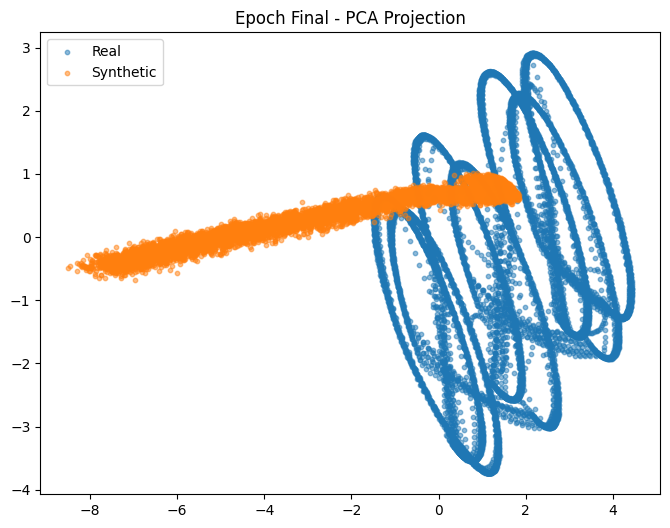

/home/ris/Desktop/UK-DALE/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


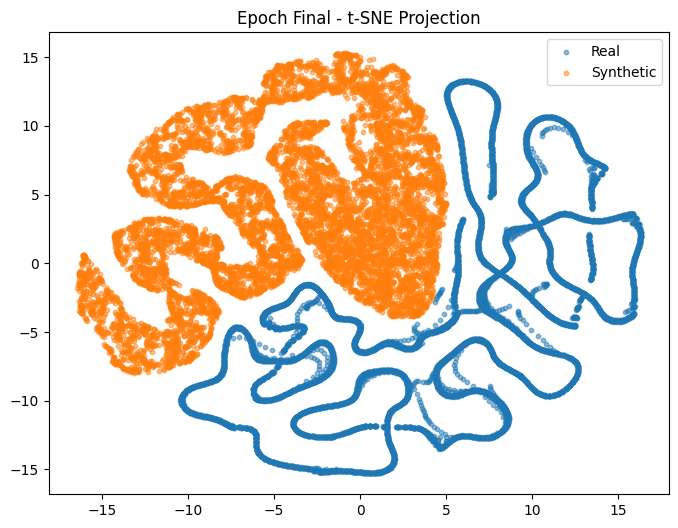

In [2]:
# Optimized PyTorch TimeGAN with Visualization - Fixed Version
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm

# GPU configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True

# ========== Data Preprocessing ==========
def load_and_preprocess_data(df, sample_fraction=0.01):
    print("Preprocessing data...")
    if len(df) > 1e6:
        df = df.sample(frac=sample_fraction, random_state=42)
        print(f"Downsampled to {len(df)} rows")

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values(by='timestamp').reset_index(drop=True)
    df = df.rename(columns={'reading': 'meter_reading'})

    def create_time_features(df):
        df['hour'] = df['timestamp'].dt.hour
        df['weekday'] = df['timestamp'].dt.weekday
        df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
        df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
        df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
        df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
        return df.drop(columns=['hour', 'weekday'])

    df = create_time_features(df)
    df['diff_meter_reading'] = df['meter_reading'].diff().fillna(0)

    feature_cols = ['diff_meter_reading', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']
    scaler = MinMaxScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])

    return df, scaler, feature_cols

def create_sequences(df, seq_len, feature_cols):
    data_array = df[feature_cols].values
    target_array = df['diff_meter_reading'].values
    n_samples = len(df) - seq_len

    X, y = [], []
    for i in range(n_samples):
        X.append(data_array[i:i+seq_len])
        y.append(target_array[i+seq_len])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# ========== Model Definitions ==========
class Generator(nn.Module):
    def __init__(self, latent_dim, seq_len, feature_dim):
        super().__init__()
        self.lstm = nn.LSTM(latent_dim, 128, batch_first=True, num_layers=2, dropout=0.2)
        self.attn = nn.MultiheadAttention(128, 4, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, feature_dim)
        )

    def forward(self, x):
        x, _ = self.lstm(x)
        x, _ = self.attn(x, x, x)
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, seq_len, feature_dim):
        super().__init__()
        self.lstm = nn.LSTM(feature_dim, 128, batch_first=True)
        self.attn = nn.MultiheadAttention(128, 4, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x, _ = self.lstm(x)
        x, _ = self.attn(x, x, x)
        x = x.mean(dim=1)
        return self.fc(x)

# ========== Training Loop ==========
def train_timegan(data, feature_cols, epochs=100, batch_size=1024, seq_len=24):
    X, y = create_sequences(data, seq_len, feature_cols)
    X_tensor = torch.tensor(X)
    dataset = TensorDataset(X_tensor)

    train_size = int(0.8 * len(dataset))
    train_set, val_set = random_split(dataset, [train_size, len(dataset) - train_size])

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size * 2)

    latent_dim = 10
    feature_dim = len(feature_cols)

    generator = Generator(latent_dim, seq_len, feature_dim).to(device)
    discriminator = Discriminator(seq_len, feature_dim).to(device)

    g_optimizer = optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))
    bce_loss = nn.BCELoss()

    for epoch in range(epochs):
        for batch_X, in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch_X = batch_X.to(device)
            batch_size = batch_X.size(0)

            real_labels = torch.ones(batch_size, 1, device=device)
            fake_labels = torch.zeros(batch_size, 1, device=device)

            # Train Discriminator
            d_optimizer.zero_grad()
            real_preds = discriminator(batch_X)
            d_loss_real = bce_loss(real_preds, real_labels)

            noise = torch.randn(batch_size, seq_len, latent_dim, device=device)
            fake_data = generator(noise)
            fake_preds = discriminator(fake_data.detach())
            d_loss_fake = bce_loss(fake_preds, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            noise = torch.randn(batch_size, seq_len, latent_dim, device=device)
            fake_data = generator(noise)
            preds = discriminator(fake_data)
            g_loss = bce_loss(preds, real_labels)
            g_loss.backward()
            g_optimizer.step()

        print(f"Epoch {epoch+1}/{epochs} - D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

    return generator

# ========== Visualization ==========
def plot_embeddings(real_data, synthetic_data, epoch, seq_len):
    real_flat = real_data.reshape(real_data.shape[0], -1)
    synth_flat = synthetic_data.reshape(synthetic_data.shape[0], -1)
    combined = np.concatenate([real_flat, synth_flat])
    labels = np.array([0]*len(real_flat) + [1]*len(synth_flat))

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(combined)

    plt.figure(figsize=(8,6))
    plt.scatter(pca_result[labels==0, 0], pca_result[labels==0, 1], label='Real', alpha=0.5, s=10)
    plt.scatter(pca_result[labels==1, 0], pca_result[labels==1, 1], label='Synthetic', alpha=0.5, s=10)
    plt.title(f"Epoch {epoch} - PCA Projection")
    plt.legend()
    plt.show()

    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    tsne_result = tsne.fit_transform(combined)

    plt.figure(figsize=(8,6))
    plt.scatter(tsne_result[labels==0, 0], tsne_result[labels==0, 1], label='Real', alpha=0.5, s=10)
    plt.scatter(tsne_result[labels==1, 0], tsne_result[labels==1, 1], label='Synthetic', alpha=0.5, s=10)
    plt.title(f"Epoch {epoch} - t-SNE Projection")
    plt.legend()
    plt.show()

# ========== Final Execution ==========
if __name__ == "__main__":
    # You must have a DataFrame `df` loaded with 'timestamp' and 'reading' columns
    data, scaler, feature_cols = load_and_preprocess_data(df)
    generator = train_timegan(data, feature_cols, epochs=50, batch_size=2048, seq_len=24)

    def generate_samples(generator, n_samples, seq_len, latent_dim=10):
        generator.eval()
        with torch.no_grad():
            noise = torch.randn(n_samples, seq_len, latent_dim).to(device)
            return generator(noise).cpu().numpy()

    synthetic_final = generate_samples(generator, 10000, 24)
    real_final, _ = create_sequences(data, 24, feature_cols)
    real_final = real_final[:10000]
    plot_embeddings(real_final, synthetic_final, epoch='Final', seq_len=24)